# Berkay Ersever 19626

In [0]:
!pip install reverse_geocoder
!pip install geopy

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import reverse_geocoder as rg
from geopy.distance import geodesic
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [0]:
url = 'https://github.com/berkayersever/data-science/blob/master/data/taxi-trips.csv?raw=true'
df = pd.read_csv(url)

# Shape

In [0]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("Number of Rows: {}, Number of Columns: {}".format(n_rows, n_columns))
column_list = list(df.columns.values)
# for i in range(n_columns):
#     print(column_list[i])

Number of Rows: 118185, Number of Columns: 11


#Data Types

In [0]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [0]:
df = df[['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']]
print(df)

In [0]:
df.isnull().sum()

In [0]:
na_ratios = df.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
print(na_ratios)

In [0]:
print(df)

In [0]:
enron_df = pd.DataFrame(df)
count = enron_df['store_and_fwd_flag'].eq('N').sum()
print(count)

In [0]:
df.isnull().sum()

In [0]:
df.head()

In [0]:
df.info()

In [0]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [0]:
rg_pick = rg.search(list(zip(df['pickup_latitude'], df['pickup_longitude'])))
rg_drop = rg.search(list(zip(df['dropoff_latitude'], df['dropoff_longitude'])))


In [0]:
pick, drop = ([] for i in range(2))
[pick.append(p['name']) for p in rg_pick]
[drop.append(d['name']) for d in rg_drop]
df['pickup_district'] = pick
df['dropoff_district'] = drop

## Top 10 Pickup Districts

In [0]:
df['pickup_district'].value_counts().head(10)

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Inwood               2032
Hoboken              1238
Guttenberg            944
Edgewater             836
Jamaica               547
Name: pickup_district, dtype: int64

## Top 10 Dropoff Districts

In [0]:
df['dropoff_district'].value_counts().head(10)

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Inwood               1741
The Bronx            1696
Edgewater            1462
Hoboken              1414
Guttenberg           1157
Name: dropoff_district, dtype: int64

In [0]:
distances = []
for i in range(len(rg_pick)):
  p1 = rg_pick[i]
  x1, y1 = p1['lat'], p1['lon']
  pick = (x1, y1)
  p2 = rg_drop[i]
  x2, y2 = p2['lat'], p1['lon']
  drop = (x2, y2)
  distances.append(geodesic(pick, drop).kilometers)

In [0]:
df['distance'] = distances
df['npickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,Manhattan,Manhattan,0.000000,2016-03-14 17:24:55
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,Long Island City,Manhattan,4.287615,2016-03-10 21:45:01
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,526,Weehawken,Manhattan,1.541368,2016-03-11 07:11:23
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,Manhattan,Long Island City,4.287615,2016-03-14 14:05:39
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,New York City,New York City,0.000000,2016-03-14 15:04:38
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,1561,Hoboken,New York City,3.300367,2016-03-12 20:39:39
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,1356,Manhattan,Weehawken,1.541368,2016-03-02 20:15:07
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,736,Manhattan,Manhattan,0.000000,2016-03-09 13:41:11
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,972,New York City,New York City,0.000000,2016-03-03 22:01:32
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,Long Island City,East New York,8.667314,2016-03-14 04:24:36


In [0]:
print(distances[0:20])

In [0]:
def convert_time(row):
    h = row['npickup_datetime'].hour
    
    if 7 <= h and h < 9:
        return "rush hour morning"
    elif 9 <= h and h < 16:
        return "afternoon"
    elif 16 <= h and h < 18:
        return "rush hour evening"
    elif 18 <= h and h < 23:
        return "evening"
    else:
        return "late_night"

In [0]:
df['time_of_day'] = df.apply(convert_time, axis=1)

In [0]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,Manhattan,Manhattan,0.000000,2016-03-14 17:24:55,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,Long Island City,Manhattan,4.287615,2016-03-10 21:45:01,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,526,Weehawken,Manhattan,1.541368,2016-03-11 07:11:23,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,Manhattan,Long Island City,4.287615,2016-03-14 14:05:39,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,New York City,New York City,0.000000,2016-03-14 15:04:38,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,1561,Hoboken,New York City,3.300367,2016-03-12 20:39:39,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,1356,Manhattan,Weehawken,1.541368,2016-03-02 20:15:07,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,736,Manhattan,Manhattan,0.000000,2016-03-09 13:41:11,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,972,New York City,New York City,0.000000,2016-03-03 22:01:32,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,Long Island City,East New York,8.667314,2016-03-14 04:24:36,late_night


In [0]:
df_steam = df.groupby(by="time_of_day").mean()

time_of_day
afternoon            2.929196
evening              3.214404
late_night           3.771974
rush hour evening    3.059598
rush hour morning    2.871136
Name: distance, dtype: float64

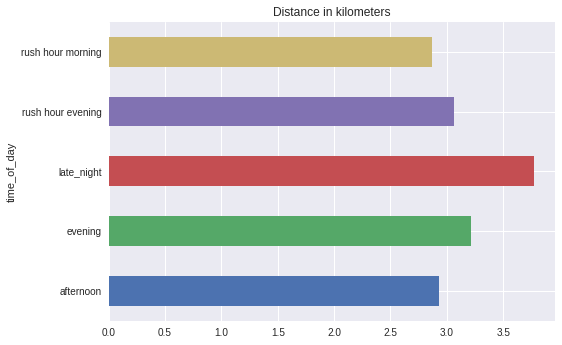

In [0]:
df_steam['distance'].plot(kind="barh", title="Distance in kilometers")

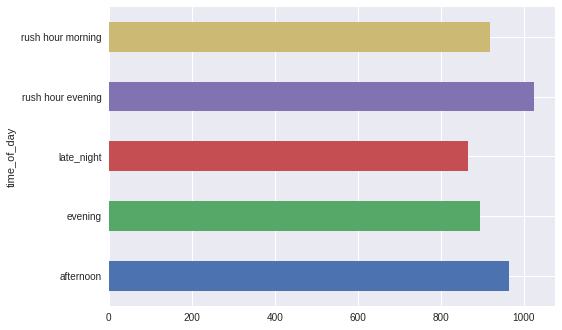

In [0]:
df_steam['trip_duration'].plot(kind="barh")

---
#Hypothesis Testing



1.   Does passenger group size affect the distance?
 *   Null hypothesis: passenger group size has no effect on the distance.
 *   Apply a suitable statistical test and show the results.


In [0]:
from scipy import stats

In [0]:
x, y = df[df['passenger_count']==1]['distance'], df[df['passenger_count']>=2]['distance']
stats.ttest_ind(x, y, equal_var=False) # Equal Variance = False

Ttest_indResult(statistic=-4.923988452238864, pvalue=8.501605194519019e-07)

In [0]:
x, y = df[df['passenger_count']<=2]['distance'], df[df['passenger_count']>=3]['distance']
stats.ttest_ind(x, y, equal_var=False) # Equal Variance = False

Ttest_indResult(statistic=-1.0492638243873378, pvalue=0.29406755187084854)

In [0]:
x, y = df[df['passenger_count']<=3]['distance'], df[df['passenger_count']>=4]['distance']
stats.ttest_ind(sample1, sample2, equal_var=False) # Equal Variance = False

Ttest_indResult(statistic=-4.923988452238864, pvalue=8.501605194519019e-07)

*   **Since the pvalue is greater than 0.05 we can't reject the null hypothesis. Passenger group size has no effect on the distance.**



---
2.   Do trip distances increase in weekends?
 *   Null hypothesis: The day of the week has no effect on the distance.
 *   Again, apply a suitable statistical test and show the results.

In [0]:
df['day_name'] = df['npickup_datetime'].dt.weekday_name
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime,time_of_day,day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,Manhattan,Manhattan,0.000000,2016-03-14 17:24:55,rush hour evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,Long Island City,Manhattan,4.287615,2016-03-10 21:45:01,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,526,Weehawken,Manhattan,1.541368,2016-03-11 07:11:23,rush hour morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,Manhattan,Long Island City,4.287615,2016-03-14 14:05:39,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,New York City,New York City,0.000000,2016-03-14 15:04:38,afternoon,Monday
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,1561,Hoboken,New York City,3.300367,2016-03-12 20:39:39,evening,Saturday
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,1356,Manhattan,Weehawken,1.541368,2016-03-02 20:15:07,evening,Wednesday
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,736,Manhattan,Manhattan,0.000000,2016-03-09 13:41:11,afternoon,Wednesday
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,972,New York City,New York City,0.000000,2016-03-03 22:01:32,evening,Thursday
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,Long Island City,East New York,8.667314,2016-03-14 04:24:36,late_night,Monday


In [0]:
weekdays = df[df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]["trip_duration"]
weekends = df[df['day_name'].isin(['Saturday','Sunday'])]["trip_duration"]

In [0]:
stats.ttest_ind(weekends, weekdays, equal_var=False) # Equal Variance = False

Ttest_indResult(statistic=-2.361713377689828, pvalue=0.018193740149220382)

In [0]:
print("Weekdays Mean: {:06.2f}\tWeekends Mean: {:06.2f}".format(weekdays.mean(), weekends.mean()))

Weekdays Mean: 941.23	Weekends Mean: 893.42


*   **Since the pvalue is less than 0.05 we can reject the null hypothesis. The day of the week has effect on the distance.**